In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("./Datasets/hamberman.csv")
df.shape

(306, 4)

In [41]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [30]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Histogram 

(array([[  0.,   0.,   0.,   0.,   0.,   0.,  14.,  26.,  33.,  41.,  53.,
          48.,  38.,  28.,  18.,   6.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          36., 134., 125.,  11.,   0.,   0.],
        [230.,  33.,  18.,   9.,  10.,   2.,   1.,   1.,   0.,   1.,   1.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [306.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ 0.        ,  4.88235294,  9.76470588, 14.64705882, 19.52941176,
        24.41176471, 29.29411765, 34.17647059, 39.05882353, 43.94117647,
        48.82352941, 53.70588235, 58.58823529, 63.47058824, 68.35294118,
        73.23529412, 78.11764706, 83.        ]),
 <a list of 4 BarContainer objects>)

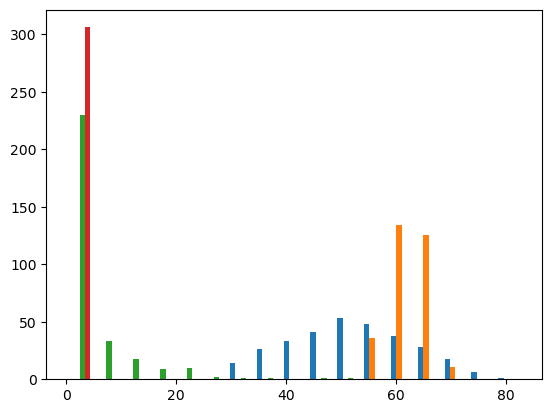

In [6]:
plt.hist(df, bins = 17)

#data: The data you want to visualize.
#bins: Number of bins (intervals) for the histogram.

<Axes: ylabel='Count'>

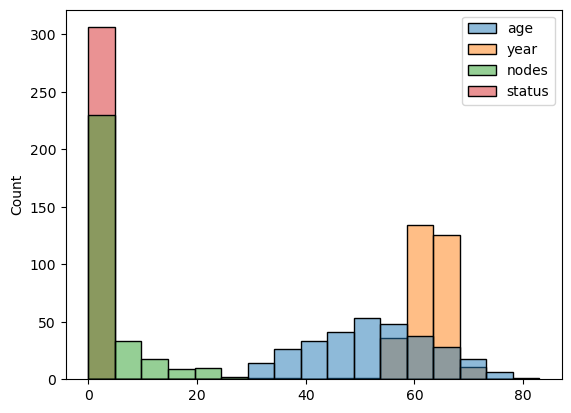

In [7]:
sns.histplot(df,bins=17)

# Scatter plot

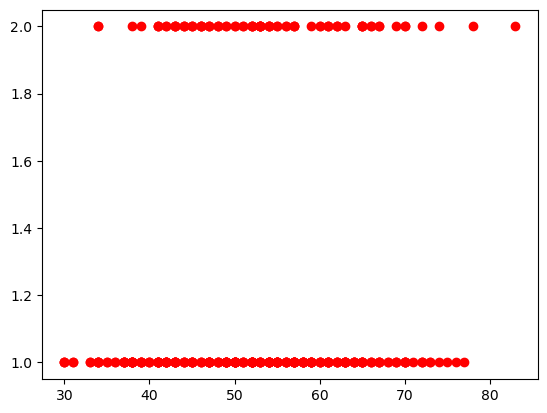

In [13]:
plt.scatter(df['age'],df['status'],c='red')

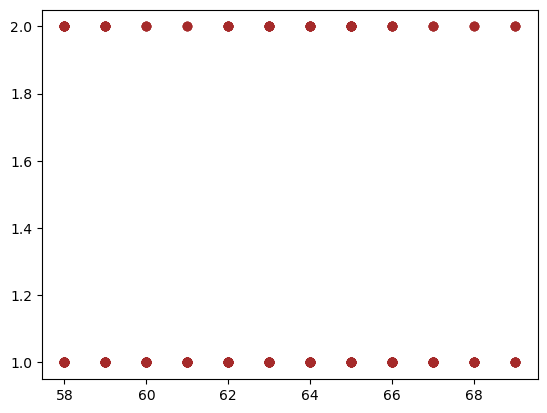

In [9]:
plt.scatter(df['year'],df['status'],c='brown')

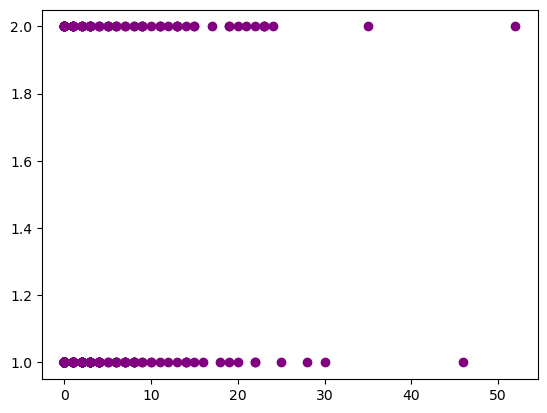

In [10]:
plt.scatter(df['nodes'],df['status'],c='purple')

# Pair Plot

C:\Users\keerthana.r\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


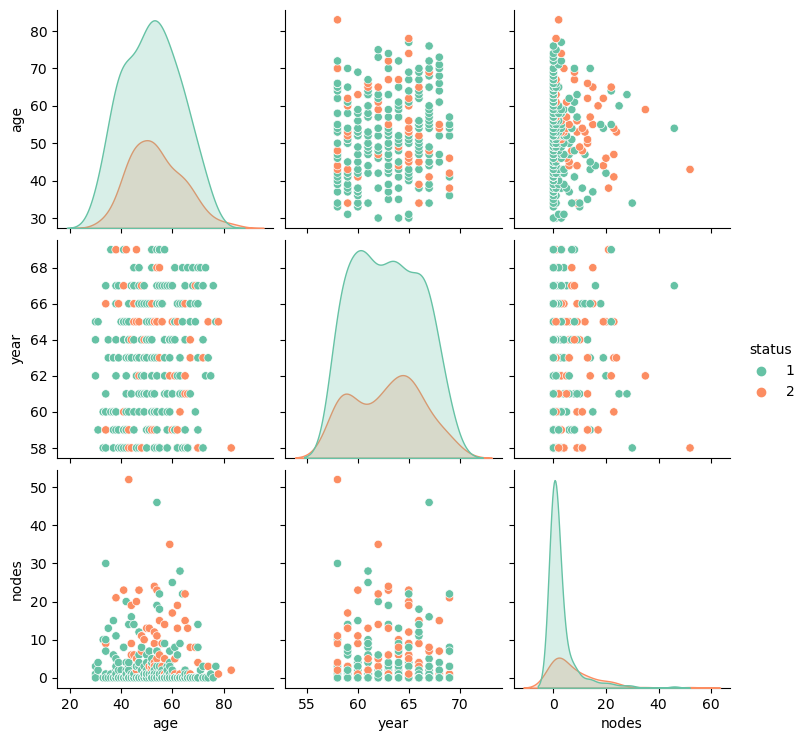

In [11]:
sns.pairplot(df, hue='status',diag_kind='kde', palette='Set2')
plt.show()

In [42]:
X= df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [44]:
model = LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [45]:
scrores = cross_val_score(model,X,Y,cv=10)
scrores.mean()

0.7450537634408603

In [50]:
mu = X.mean(axis=0)
sd = X.std(axis=0)

#standardization
X= (X-mu)/sd
X.head()

,age,year,nodes
0,-2.078735,0.353006,-0.420903
1,-2.078735,-0.262492,-0.142725
2,-2.078735,0.660755,-0.559991
3,-1.986172,-1.185738,-0.281814
4,-1.986172,0.660755,-0.003636


In [47]:
model = LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [48]:
scrores = cross_val_score(model,X,Y,cv=10)
scrores.mean()

0.7450537634408603

In [51]:
from sklearn.feature_selection import SelectKBest

In [59]:
bestFeatures = SelectKBest(k='all')

#The default value of k in SelectKBest is 10. This means that if you do not specify a value for k, SelectKBest will select the top 10 features by default.
#here we have only 3 features, if you do not specify a value for k, SelectKBest will select the top 10 features the will get an error. So we specified k=all, so it will consider all the features. So we have 3 features hence k =3 

In [60]:
fit = bestFeatures.fit(X,Y)
fit.scores_

array([1.41015399e+00, 6.91176195e-03, 2.72397086e+01])

In [61]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumn = pd.DataFrame(X.columns)

featuresScores = pd.concat([dfcolumn,dfscores],axis=1)
featuresScores.columns = ["Features","Scores"]

featuresScores

,Features,Scores
0,age,1.410154
1,year,0.006912
2,nodes,27.239709


In [62]:
featuresScores = featuresScores.sort_values(by='Scores',ascending=False)
featuresScores

,Features,Scores
2,nodes,27.239709
0,age,1.410154
1,year,0.006912


In [69]:
top_2 = list(featuresScores[:2]['Features'].values)
top_2

['nodes', 'age']

In [67]:
model.fit(X[top_2],Y)

LogisticRegression()

In [70]:
scrores = cross_val_score(model,X[top_2],Y,cv=10)
scrores.mean()

0.7482795698924731